## Processamento de Linguagem Natural para Análise de Críticas de Filmes

Database em https://www.kaggle.com/luisfredgs/imdb-ptbr

In [1]:
import pandas as pd

In [2]:
review = pd.read_csv("imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
# trocando neg por 0 e pos por 1
change = review["sentiment"].replace(["neg", "pos"], [0, 1])
change.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [4]:
# adicionando coluna a review
review["sentimentBIN"] = change
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [5]:
# checando se dados estão balanceados para executar treinamento
print(review["sentimentBIN"].value_counts())

0    24765
1    24694
Name: sentimentBIN, dtype: int64


In [6]:
# retirando acentuação
!pip install unidecode
import unidecode

withoutAccentuation = list()

for i in review["text_pt"]: 
    withoutAccentuation.append(unidecode.unidecode(i))
    
review['reviewWithoutAccentuation'] = withoutAccentuation

review['reviewWithoutAccentuation'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessario. Alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. A maioria de nos tem fantasmas no armario, e o personagem Costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. O personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, Ashton Kutcher. O problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. Seu unico obstaculo parece estar vencendo Costner. Finalmente, quando estamos bem alem do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. Nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

In [7]:
# deixando tudo minúsculo
lowercasePhrase = list()

for i in review["reviewWithoutAccentuation"]: 
    lowercasePhrase.append(i.lower())

review['reviewLowercase'] = lowercasePhrase

review['reviewLowercase'][0]

'mais uma vez, o sr. costner arrumou um filme por muito mais tempo do que o necessario. alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. a maioria de nos tem fantasmas no armario, e o personagem costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. o personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, ashton kutcher. o problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. seu unico obstaculo parece estar vencendo costner. finalmente, quando estamos bem alem do meio do caminho, costner nos conta sobre os fantasmas dos kutchers. somos informados de por que kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

In [8]:
# download data
!pip install -U nltk
import nltk
nltk.download('all')

Requirement already up-to-date: nltk in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.4)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package cess_

[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/izabellamelo/nltk_data..

True

In [9]:
# stop words da ntlk
from nltk import tokenize
stopWords = nltk.corpus.stopwords.words("portuguese")

# stop words de pontuação
from string import punctuation
punctuationStopWords = list()

for dot in punctuation:
    punctuationStopWords.append(dot)
    
stopWords.extend(punctuationStopWords)

# stop words de caso
newStopWords = ["..."]
stopWords.extend(newStopWords)

print(stopWords)
    

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [10]:
withoutStopWords = list()
token = tokenize.WordPunctTokenizer()

for i in review["reviewLowercase"]:
    phrase = list()
    textWords = token.tokenize(i)
    
    for words in textWords:
        if words not in stopWords:
            phrase.append(words)
    
    withoutStopWords.append(' '.join(phrase))

review['reviewWithoutStopWords'] = withoutStopWords

review['reviewWithoutStopWords'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais ha poucas simplesmente nao importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido ate tarde nao importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor nao mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer nao desligar hora'

In [11]:
# retirando radical
stemmer = nltk.RSLPStemmer()
stemmerPhrase = list()

token = tokenize.WordPunctTokenizer()

for i in review["reviewWithoutStopWords"]:
    phrase = list()
    textWords = token.tokenize(i)
    
    for words in textWords:
        phrase.append(stemmer.stem(words))
    
    stemmerPhrase.append(' '.join(phrase))

review['reviewStemmer'] = stemmerPhrase

review['reviewStemmer'][0]

'vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual ha pouc simples nao import nenhum person maior fantasm armari person cost realiz log inici esquec ate tard nao import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor nao mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz nao deslig hor'

### WORLD CLOUD

Biblioteca em https://github.com/amueller/word_cloud

In [12]:
!pip install wordcloud
!python -m pip install -U matplotlib

%matplotlib inline

Requirement already up-to-date: matplotlib in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.0.3)


In [13]:
from wordcloud import WordCloud

# nuvem de palavras positivas
posReview = review.query("sentiment=='pos'")
print(posReview["reviewStemmer"][12389])

wordsPos = ' '.join([word for word in posReview["reviewStemmer"]])

vi film ont noit ser persuad algum amig admit relut ve lo porqu sab ashton kutch so consegu faz comed err kutch interpret person jak fisch bem kevin costn interpret ben randall tal profission sinal bom film pod brinc emoco fez exat tod teatr vend super ris dur prim metad film lev lagr dur segund semestr sair teatr nao so vi muit mulh lagr tamb muit hom adult tent desesperad nao deix ning ve lo chor film otim sugir voc va ve lo ant julg


In [14]:
cloudPos = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsPos)

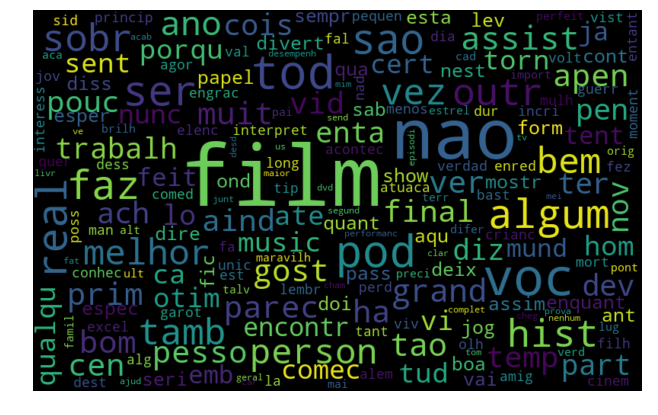

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,7))
plt.imshow(cloudPos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
# nuvem de palavras negativas
negReview = review.query("sentiment=='neg'")
print(negReview["reviewStemmer"][0])

wordsNeg = ' '.join([word for word in negReview["reviewStemmer"]])

vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual ha pouc simples nao import nenhum person maior fantasm armari person cost realiz log inici esquec ate tard nao import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor nao mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz nao deslig hor


In [17]:
cloudNeg = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsNeg)

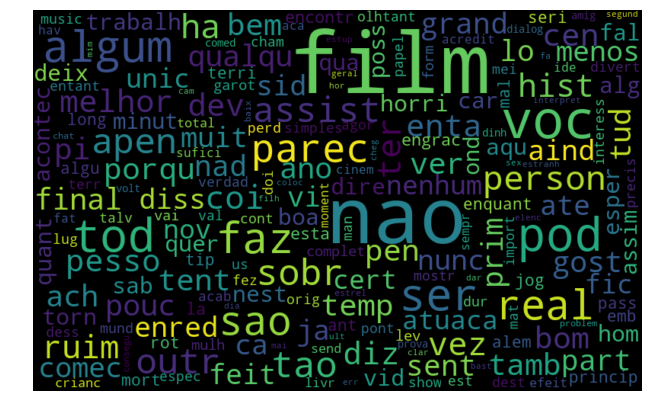

In [18]:
plt.figure(figsize=(30,7))
plt.imshow(cloudNeg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
token = tokenize.WordPunctTokenizer()
allWords = ' '.join([text for text in review["reviewStemmer"]])

frequency = nltk.FreqDist(token.tokenize(allWords))

frequencyDF = pd.DataFrame({"Palavras": list(frequency.keys()),
                           "Frequencia": list(frequency.values())})
frequencyDF.head()

,Palavras,Frequencia
0,vez,25548
1,sr,1894
2,costn,82
3,arrum,118
4,film,192424


In [20]:
frequencyDFtop10 = frequencyDF.nlargest(columns="Frequencia", n=10)
frequencyDFtop10

,Palavras,Frequencia
4,film,192424
16,nao,147337
145,voc,58482
130,tod,45616
67,pod,43725
60,ser,39468
448,algum,37807
68,faz,37152
111,real,36548
74,sao,35329


In [21]:
!pip install seaborn

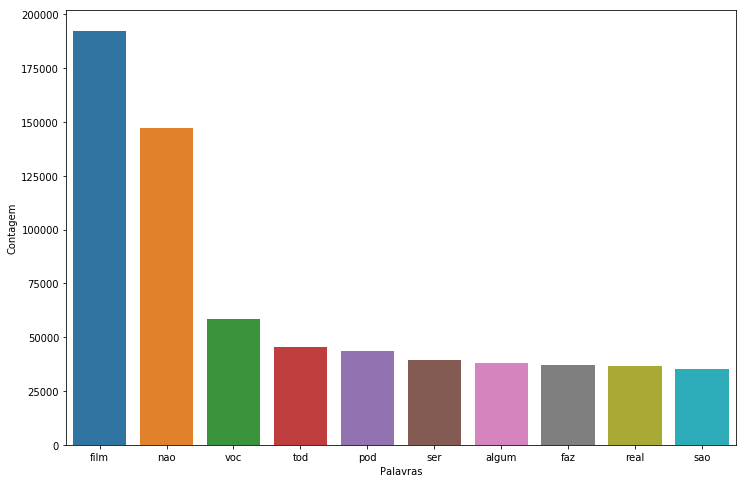

In [22]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=frequencyDFtop10, x="Palavras", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

### BAG OF WORDS
Neste modelo, o texto (uma frase ou documento) é representado como um multiconjunto de suas palavras (o "saco"), desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade


In [23]:
# implementando bag of words (fazendo dicionário de palavras)
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
model = CountVectorizer(lowercase=True, max_features=50)

bagOfWords = model.fit_transform(review["reviewStemmer"])
model.get_feature_names()

['ach',
 'aind',
 'algum',
 'ano',
 'apen',
 'assist',
 'ate',
 'bem',
 'bom',
 'cen',
 'cois',
 'dev',
 'diz',
 'enta',
 'faz',
 'film',
 'final',
 'gost',
 'grand',
 'ha',
 'hist',
 'lo',
 'melhor',
 'muit',
 'nao',
 'outr',
 'parec',
 'part',
 'person',
 'pesso',
 'pod',
 'porqu',
 'pouc',
 'prim',
 'qualqu',
 'real',
 'sao',
 'sent',
 'ser',
 'sobr',
 'tamb',
 'tao',
 'temp',
 'tent',
 'ter',
 'tod',
 'tud',
 'ver',
 'vez',
 'voc']

In [25]:
# transformando numa matriz para visualizar melhor
dictionary = pd.SparseDataFrame(bagOfWords, columns = model.get_feature_names())
dictionary.head()

,ach,aind,algum,ano,apen,assist,ate,bem,bom,cen,...,tamb,tao,temp,tent,ter,tod,tud,ver,vez,voc
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,NaN,1.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,1.0,2.0
3,NaN,1.0,NaN,1.0,1.0,1.0,2.0,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,4.0,NaN,1.0,NaN,1.0
4,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# separando dados para treino e teste (75% treino, 25% teste)
from sklearn.model_selection import train_test_split

In [27]:
train, test, trainClass, testClass = train_test_split(bagOfWords, review["sentimentBIN"], random_state = 42)

In [28]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(train, trainClass)

# testando
score = logisticRegression.score(test, testClass)
print(score)

0.6794177112818439


### TF-IDF

é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

modelTfidf = TfidfVectorizer()

tfidf = modelTfidf.fit_transform(review["reviewStemmer"])
trainTfidf, testTfidf, trainClassTfidf, testClassTfidf = train_test_split(tfidf, review["sentimentBIN"], 
                                                                          random_state = 42)

In [36]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(trainTfidf, trainClassTfidf)

# testando
scoreTfidf = logisticRegression.score(testTfidf, testClassTfidf)
print(scoreTfidf)

0.8854832187626365
